In [1]:
import pandas as pd # Indicators

In [28]:
# import indicator data into dataframe
Indicators = pd.read_csv('D:/Digital_Trainee/all_csv_file/Indicators.csv', sep=',') #csv - comma seprated values
print(type(Indicators))
Indicators.head(10) #Indicators by defualt 5 value but get 10 vlaue

<class 'pandas.core.frame.DataFrame'>


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [29]:
Indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [30]:
Indicators.columns

Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')

# Step 1: Intial exploration of the Dataset

In [31]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv('D:/Digital_Trainee/all_csv_file/Indicators.csv')
data.shape

(5656458, 6)

In [33]:
# how many unique country name are there ?
countries = data['CountryName'].unique().tolist() # tolist = converts data into list
len(countries)

247

# are there same number of country codes ?

In [34]:
# are there same number of country codes ?

countrycodes = data['CountryCode'].unique().tolist()
len(countrycodes)

247

# how many years indicators or few ?

In [35]:
# how many years indicatros are there ? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

# how many years of data do we have ?

In [36]:
years = data['Year'].unique().tolist()
len(years)

56

In [37]:
print(str(min(years)) + " to " + str(max(years)))

1960 to 2015


# Matplotlib: Basic Plotting, Part 1

#### lets pic a country and a indicator to explore: CO2 Emissions per capita and the USA 

In [38]:
# select CO2 emissions for the united states
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just thouse indicators matching the USA for country code and CO2 emissions over time.
stage = data[mask1 & mask2]

In [39]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


# create bar plot

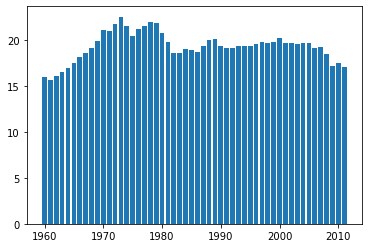

In [40]:
# get the years
years = stage['Year'].values

# get the values 
co2 = stage['Value'].values

#create
plt.bar(years,co2)
plt.show()

In [41]:
# plot line

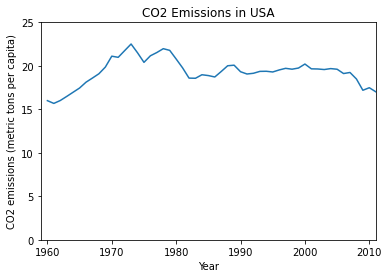

In [42]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

# label the figure
plt.title('CO2 Emissions in USA')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011, 0, 25])

plt.show()

In [43]:
# Using Hisrogram of the data

In [44]:
hist_data = stage['Value'].values

In [45]:
print(len(hist_data))

52


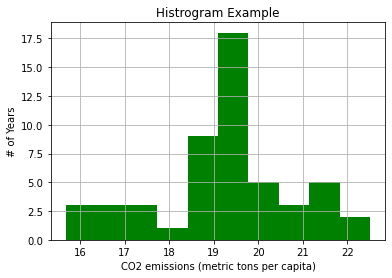

In [46]:
# the histrogram of the data
plt.hist(hist_data,10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0]) # Co2 emission
plt.ylabel('# of Years')
plt.title('Histrogram Example')

plt.grid(True)

plt.show()

# but how do the USA number related to  those of other countries ?

In [47]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [48]:
print(len(co2_2011))

232


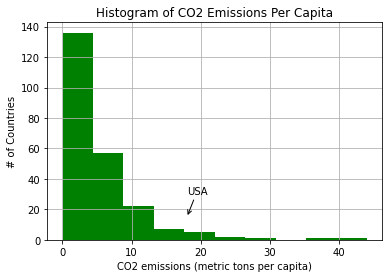

In [49]:
# subplot return a touple with the figure, axis attributes.

fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18,15), xycoords='data',
            xytext=(18,30), textcoords='data',   #18,30 arrow position
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="arc3"),
           )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')
# density: width of your bins false will have all same size of bins

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)
plt.show()

# Realtionship between GDP and CO2 Emissions in USA

In [50]:
#select GDP per capita emissions for the united states
hist_indicator = ('GDP per capita \(constant 2005')
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2= data['CountryCode'].str.contains(hist_country)

#stage is just those indicators matching the usa for country code and CO2 emissions over time.
gdp_stage= data[mask1 &mask2]
#plot  gdp_stage vs stage

In [51]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [52]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


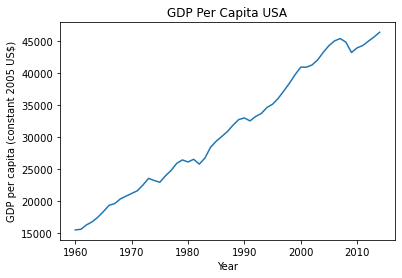

In [53]:
#switch to line plot 
plt.plot(gdp_stage['Year'].values , gdp_stage['Value'].values)

#Label the axis 
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita USA')
#to make more honest ,start the y axis at 0
#plt.axis([1959 ,2011,0,25])

plt.show()

# ScatterPlot for comparing GDP against CO2 emissions (per capita)

#### First, we'll need to make sure we're looking at the same time frames.

In [59]:
print('GDP Min Year = ', gdp_stage['Year'].min(), "Max : ", gdp_stage['Year'].max())
print('CO2 Min Year = ', stage['Year'].min(), "Max : ", stage['Year'].max())

GDP Min Year =  1960 Max :  2014
CO2 Min Year =  1960 Max :  2011


#### we have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare (this is actuall required by scatterplot)

In [60]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


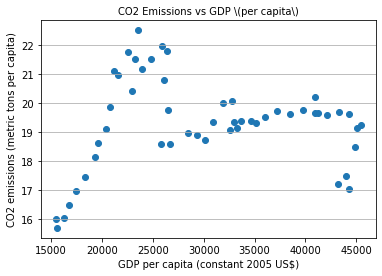

In [61]:
fig ,axis = plt.subplots()
#Grid lines ,Xticks ,Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title("CO2 Emissions vs GDP \(per capita\)",fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

x=gdp_stage_trunc['Value']
y=stage['Value']

axis.scatter(x,y)
plt.show()

In [62]:
# scatterplot graph its dotted show the value of x and y location

In [63]:
# this doesnt look like a string relationship. we can test this by looking at correlation.

In [58]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])